In [70]:
import pandas as pd

# Load Excel file into a pandas DataFrame
file_path = r'/Users/jkim/Library/CloudStorage/OneDrive-OmniAb,Inc/Documents/Weekly Tuesday Meeting/2024-07-15 Experiment Tracking Summary xPloration.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows to understand the structure
print(df.head())


   Year  Month Instrument Project  Chip Animal Unnamed: 6
0  2024  April         P2  OMNI04    99  80293        NaN
1  2024  April         P2  OMNI04     1  81070        NaN
2  2024  April         P2  OMNI04    10  80293        NaN
3  2024  April         P2  ORST04     5     R3        NaN
4  2024    May         P2  ORST04    11     R4        NaN


/var/folders/6t/981rzqln4nl2g_w6jgcgfv_c0000gq/T/ipykernel_43412/3772135098.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(all_projects))


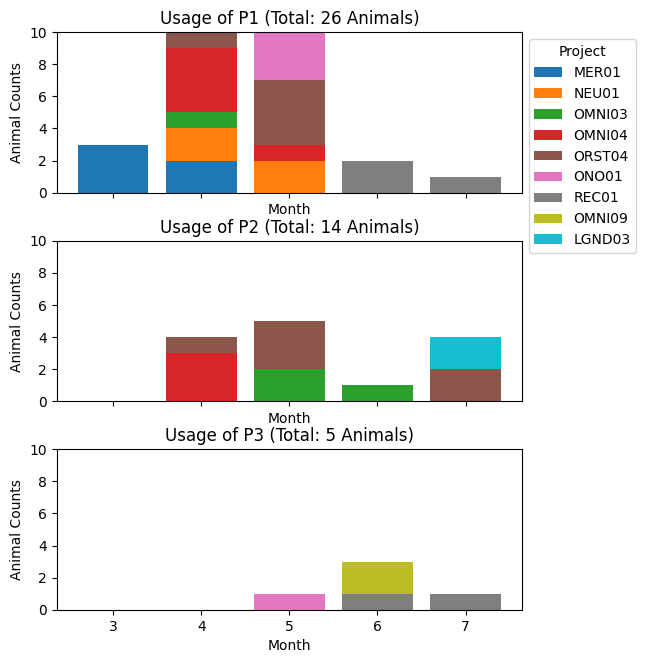

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Group by Instrument, Month, and Project and count animals
usage_counts = df.groupby(['Instrument', 'Month', 'Project'])['Animal'].count().reset_index()

# Get unique instruments and months
instruments = usage_counts['Instrument'].unique()

# Mapping month names to integer values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Map month names to integer values
usage_counts['Month'] = usage_counts['Month'].map(month_mapping)

# Sort by the mapped integer values (ascending order)
usage_counts = usage_counts.sort_values(by='Month')

# Get all unique projects
all_projects = usage_counts['Project'].unique()

# Sort months by their integer values
months = sorted(usage_counts['Month'].unique())

# Set up colors for projects (assuming you have a limited number of projects)
colors = plt.cm.get_cmap('tab10', len(all_projects))

# Create subplots for each instrument with shared y-axis
fig, axs = plt.subplots(len(instruments), 1, figsize=(6, 2.5 * len(instruments)), sharex=True, sharey=True)

# Plotting each instrument's data
for i, instrument in enumerate(instruments):
    # Filter data for the current instrument
    instrument_data = usage_counts[usage_counts['Instrument'] == instrument]
    
    # Calculate total counts for the instrument
    total_counts = instrument_data.groupby('Month')['Animal'].sum().reindex(months, fill_value=0).sum()
    
    # Initialize array to store stacked counts
    bottom = np.zeros(len(months))
    
    # Plot for the current instrument
    ax = axs[i]
    
    # Plot stacked bars for each project
    for j, project in enumerate(all_projects):
        project_data = instrument_data[instrument_data['Project'] == project]
        counts = project_data.groupby('Month')['Animal'].sum().reindex(months, fill_value=0)
        ax.bar(months, counts, bottom=bottom, color=colors(j), label=project)
        bottom += counts  # Update the bottom array to stack the next set of bars
    
    ax.set_xlabel('Month')
    ax.set_ylabel('Animal Counts')
    
    # Set title with instrument name and total counts
    ax.set_title(f'Usage of {instrument} (Total: {total_counts} Animals)')
    
    # Display legend for the first plot only
    if i == 0:
        ax.legend(title='Project', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3)  # Adjust the value to your preference
dir = r'/Users/jkim/Library/CloudStorage/OneDrive-OmniAb,Inc/Documents/Weekly Tuesday Meeting'
plt.savefig(os.path.join(dir, 'xPloration_usage.png'), bbox_inches = 'tight')
# Show the plot
plt.show()


  Using cached contourpy-1.2.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached kiwisolver-1.4.5-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached contourpy-1.2.1-cp39-cp39-macosx_11_0_arm64.whl (244 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.5 MB/s eta 0:00:00m eta 0:00:010:01
Using cached kiwisolver-1.4.5-cp39-cp39-macosx_11_0_arm64.whl (66 kB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.
